# Linear Regression

## Code implementation

In [1]:

import numpy as np
import matplotlib.pyplot as plt

Define the function $ f_{\pmb{w}, b} $ as a liner function: 
$$
f_{\pmb{w}, b}(x) = \pmb{w} * \pmb{x} + b
$$

In [2]:
def f_x(x, w, b):
    return np.dot(x, w) + b

### Cost function
Define the cost function as a squared error cost function with regularization:
$$
J(\pmb{w}, b) = \frac{1}{2m} \sum_{i=1}^{m} (f_{\pmb{w}, b}(\pmb{x}^{(i)}) - y^{(i)})^2 + \frac{\lambda}{2m}  \sum_{j=1}^{n} w_j^2 \tag{1}
$$

In [49]:
def cost_fun(X, y, w, b, lambda_):
    m, n = X.shape
    cost = 0
    for i in range(m):
        err = f_x(X[i], w, b) - y[i]
        cost += err**2
    cost = cost / (2*m)
    # Regularization
    reg_cost = 0
    for j in range(n):
        reg_cost += w[j]**2
    reg_cost = (lambda_/(2*m)) * reg_cost 
    # Total cost
    cost = cost + reg_cost
    return cost

### Gradient descent algorithm
repeat each iteration:
$$ \pmb{w} = \pmb{w} - \alpha \frac{\partial}{\partial \pmb{w}}J(\pmb{w}, b) $$
$$ b = b - \alpha \frac{\partial}{\partial b}J(\pmb{w}, b) $$

Cost derivatives:
$$
\frac{\partial}{\partial \pmb{w}}J(\pmb{w}, b) = \frac{1}{m}\sum_{i=1}^{m}(f_{\pmb{w}, b}(\pmb{x}^{(i)}) - y^{(i)}) \pmb{x}^{(i)} +  \frac{\lambda}{m} w_j \tag{2} 
$$
$$
\frac{\partial}{\partial b}J(\pmb{w}, b) = \frac{1}{m}\sum_{i=1}^{m}(f_{\pmb{w}, b}(\pmb{x}^{(i)}) - y^{(i)})
$$

In [4]:
def cost_derivative(X, y, w, b, lambda_):
    m, n = X.shape
    dj_w = np.zeros(n)
    dj_b= 0
    for i in range(m):
        err = f_x(X[i], w, b) - y[i]
        dj_w += err * X[i]
        dj_b += err
    dj_w = dj_w / m
    dj_b = dj_b / m
    
    dj_w = dj_w + (lambda_/m) * w  # Regularization
    
    return dj_w, dj_b


In [39]:
def iter_print(iter, w, b, cost):
    print(f'Iter: {iter} - w: {w}, b: {b}, cost: {cost}')

def gradient_decent(X, y, w, b, alpha, iterations, lambda_):
    history = []
    for i in range(iterations+1):
        dj_w, dj_b = cost_derivative(X, y, w, b, lambda_)  # Calclate derivatives
        # Set new paramiters
        w = w - alpha*dj_w 
        b = b - alpha*dj_b
        if i % 100 == 0:  # Every 100 iterations save the paramiters and cost
            cost = cost_fun(X, y, w, b, lambda_)
            iter_print(i, w, b, cost) # Print iteration
            history.append([w, b, cost])
    return w, b, history
    

### Feature Scaling
Perform some transformation on the traning data to have a similar scale

Z-score normalization:
$$ x_i = \frac{x_i - \mu_i}{\sigma_i}

In [6]:
def z_score (x):
    mu = np.mean(x)
    sdt = np.std(x)
    x = (x - mu) / sdt
    return x, mu, sdt
    

## Test algorthm

Data creation and plotting

In [7]:
def get_data(m, c): # Create training data from the function y = X^2
    X_train = np.arange(0,m,1)
    np.random.seed(1)
    y_ideal = X_train**2 + c
    y_train = y_ideal + 0.7 * y_ideal*(np.random.sample((m,))-0.5)
    
    return X_train, y_train


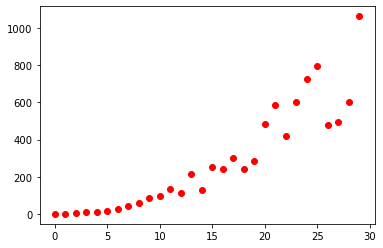

In [8]:
m = 30
c = 0
x_train, y_train = get_data(m, c) # get tranong data
x_train = x_train.reshape(-1, 1)

plt.plot(x_train, y_train, 'ro') # Training data plot
plt.show()

Run gradient descent

In [50]:
X_train = np.c_[x_train, x_train**2, x_train**3, x_train**4] # Engineer feature
# Initialize values
w = np.zeros(X_train[0].shape)
b = 0
alpha = 1e-11
iter = 1000

model_w, model_b, history = gradient_decent(X_train, y_train, w, b, alpha, iter, 1) # Run gradient decent

Iter: 0 - w: [6.29329594e-08 1.48248477e-06 3.63424078e-05 9.16317011e-04], b: 2.8409926395348212e-09, cost: 20837.90461095301
Iter: 100 - w: [1.02220366e-06 1.49468922e-05 1.94041862e-04 1.45992249e-03], b: 6.982738147652341e-08, cost: 11385.576974714442
Iter: 200 - w: [1.94806216e-06 2.75813296e-05 3.30596854e-04 1.45469202e-03], b: 1.3541913234378254e-07, cost: 11366.741993328087
Iter: 300 - w: [2.87264611e-06 4.01978982e-05 4.66954668e-04 1.44946911e-03], b: 2.0092430127667668e-07, cost: 11347.961356435948
Iter: 400 - w: [3.79595735e-06 5.27966237e-05 6.03115589e-04 1.44425374e-03], b: 2.663430132700219e-07, cost: 11329.234907237511
Iter: 500 - w: [4.71799773e-06 6.53775319e-05 7.39079902e-04 1.43904589e-03], b: 3.316753931381803e-07, cost: 11310.562489384678
Iter: 600 - w: [5.63876907e-06 7.79406484e-05 8.74847889e-04 1.43384557e-03], b: 3.969215655153198e-07, cost: 11291.943946980455
Iter: 700 - w: [6.55827321e-06 9.04859991e-05 1.01041983e-03 1.42865275e-03], b: 4.62081654855674

Run Gradient descednt with feature scaling

In [51]:
x_train_norm, mu, sdt = z_score(x_train) # Get traninge set normalized

X_train_norm = np.c_[x_train_norm, x_train_norm**2, x_train_norm**3, x_train_norm**4] # Engineer feature
# Initialize values
w = np.zeros(X_train_norm[0].shape)
b = 0
alpha = 1e-2
iter = 1000

model_norm_w, model_norm_b, history = gradient_decent(X_train_norm, y_train, w, b, alpha, iter, 1) # Run gradient decent

Iter: 0 - w: [2.5115491  3.40041359 4.4540394  6.55004682], b: 2.8409926395348215, cost: 70165.16459593108
Iter: 100 - w: [73.28317679 51.08923354 83.15429519 31.67484363], b: 109.50746183358328, cost: 12001.384651582157
Iter: 200 - w: [96.09778211 61.73981974 72.97892949 16.02851641], b: 158.66817335866457, cost: 8510.473112833135
Iter: 300 - w: [115.19402145  66.14107645  63.73591431   8.32684834], b: 184.53037942181368, cost: 7288.112782612336
Iter: 400 - w: [131.41774908  67.39614712  55.87754864   4.70352387], b: 198.31133323859274, cost: 6751.63572143938
Iter: 500 - w: [145.20294319  67.1029568   49.20030302   3.1614007 ], b: 205.81385855973707, cost: 6456.216387520371
Iter: 600 - w: [156.91614612  66.0817169   43.52668413   2.66991742], b: 210.04091833118167, cost: 6266.977481274374
Iter: 700 - w: [166.86878976  64.75096167  38.70584158   2.69815189], b: 212.54752733439238, cost: 6136.332861012946
Iter: 800 - w: [175.32549592  63.32195448  34.60959838   2.97338602], b: 214.13981

### Results plot

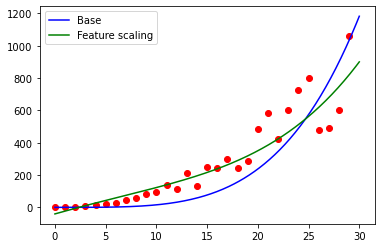

In [52]:

plt.plot(X_train[:,0], y_train, 'ro')

x = np.linspace(0,30,300)
X = np.c_[x, x**2, x**3, x**4]

plt.plot(x, X@model_w + model_b, 'b', label='Base')

x = np.linspace(0, 30,300)
x_sup, mu, sdt = z_score(x)
X = np.c_[x_sup, x_sup**2, x_sup**3, x_sup**4]

plt.plot(x, X@model_norm_w + model_norm_b, 'g', label='Feature scaling')

plt.legend()
plt.show()
